# **W1D1: Introduction to the Climate System and Xarray**

## Overview

In tutorials 4 to 9 of today, we will introduce various tools within [Xarray](https://xarray.dev/) to help us analyze and interpret climate data, such as sea surface temperature data. 

We'll cover these topics:

1. Arithmetic and Aggregation Methods
1. `groupby` operation to enable **split-apply-combine** workflow
1. `.weighted()` method
1. `resample`, `rolling`, and `coarsen` methods
1. Masking data using `xr.where()` or `.where()` method

# **Tutorial 9: Masking with Multiple Conditions**

**Week 1, Day 1, Introduction to the Climate System**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Ohad Zivan

**Content editors:** Agustina Pesce

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS



## **Code and Data Sources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).

# **Tutorial Objectives**

In the previous tutorial, we masked data using one condition (areas where SST was above 0ºC). We can also mask data using multiple conditions. For example, we can mask data from regions outside a certain spatial area by providing constraints on the latitude and longitude. 

In this tutorial, we will practice masking data using multiple conditions in order to interpret SST in the tropical Pacific Ocean and begin to assess changes in the El Nino Southern Oscillation (ENSO).

In [4]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# Setup


In [2]:
# !pip install matplotlib.pyplot
# !pip install numpy
# !pip install xarray
# !pip install pythia_datasets
# !pip install pandas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd

In [5]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

ModuleNotFoundError: No module named 'ipywidgets'

Let's load the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [6]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath,decode_times=False)
new_time = pd.date_range(start='2000-01-15', end='2014-12-15', periods=180)
ds = ds.assign(time=new_time)

/Users/chi/miniconda3/lib/python3.10/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


# Section 1: Using `where` with multiple conditions

`.where()` allows providing multiple conditions. To do this, we need to make sure each conditional expression is enclosed in `()`. To combine conditions, we use the `bit-wise and` (`&`) operator and/or the `bit-wise or` (`|`). Let's use `.where()` to mask locations with temperature values **greater than 25 and less than 30**:

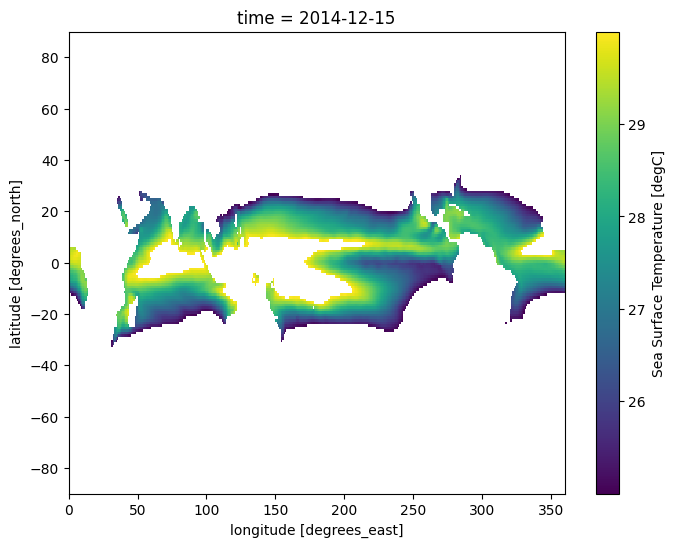

In [16]:
sample = ds.tos.isel(time=-1) #
sample.where((sample > 25) & (sample < 30)).plot(size=6);

# Section 2: Using `where` with a custom fill value

`.where()` can take a second argument, which, if supplied, defines a fill value for the masked region. Below we fill masked regions with a constant `0`:

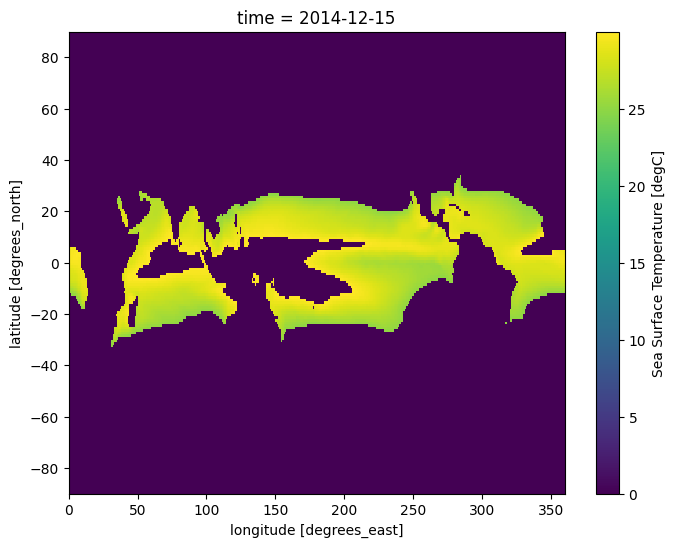

In [17]:
sample.where((sample > 25) & (sample < 30), 0).plot(size=6);

# Section 3: Using `where` with specific coordinates

We can use coordinates to apply a mask as well. For example, we can use a mask to assess tropical Pacific SST associated with the El Nino Southern Oscillation (ENSO). As we learned in the video, ENSO is a climate phenomena that originates in the tropical Pacific ocean but has global impacts on atmospheric circulation, temperature and precipitation. The two phases of ENSO are El Niño (warmer than average SSTs in the central and eastern tropical Pacific Ocean) and La Niña (cooler than average SSTs in the central and eastern tropical Pacific Ocean). The Niño 3.4 region is an area in the centeral and eastern Pacific Ocean that is often used for determining the phase of ENSO. Below, we will use the `latitude` and `longitude` coordinates to mask everywhere outside of the [Niño 3.4 region](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/):

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)



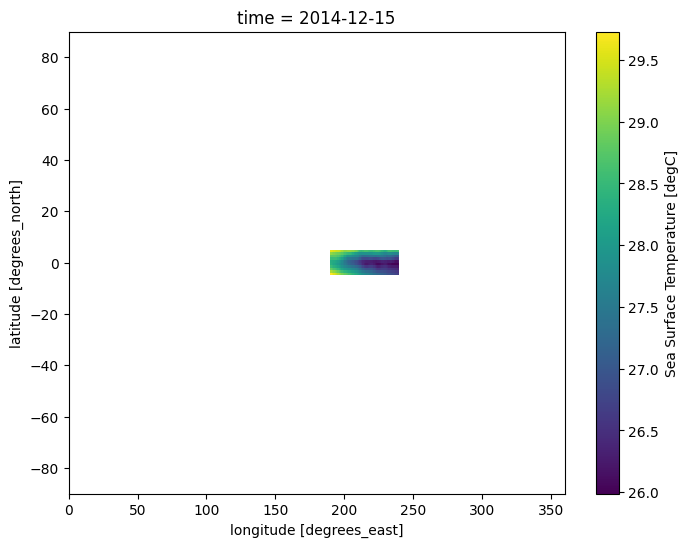

In [18]:
sample.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
).plot(size=6);

- What do you observe about the SST in this region?
- Do you think this was an El Niño year or a La Niña year?

Now let's look at a time series of the data from this masked region. Rather than specifying a certain time period, we can mask all areas outside of the Niño 3.4 region and then take the spatial mean to assess changes in Niño 3.4 SST over this time period.

In [22]:
# to_remove explanation

"""
Heat map indicates more areas with darker (colder) region. If the 3-month average SST anomaly is indeed less than or equal to -0.5 ˚C, it may suggest a La Niña event. Do remember that official identification of El Niño and La Niña events is determined by monitoring multiple aspects of the climate system over time, not just sea surface temperatures in one region.
"""

'\nHeat map indicates more areas with darker (colder) region. If the 3-month average SST anomaly is indeed less than or equal to -0.5 ˚C, it may suggest a La Niña event.\n'

In [20]:
nino = ds.tos.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
) 

nino_mean = ds.tos.mean(dim=['lat', 'lon'])
nino_mean

<xarray.DataArray 'tos' (time: 180)>
array([14.209291 , 14.301911 , 14.214222 , 14.105894 , 14.005788 ,
       14.019834 , 14.077742 , 14.13642  , 14.069463 , 13.929279 ,
       13.897242 , 14.054486 , 14.260762 , 14.336    , 14.282292 ,
       14.175469 , 14.108064 , 14.149008 , 14.241707 , 14.3227625,
       14.2158785, 14.095403 , 14.062266 , 14.211877 , 14.413039 ,
       14.491661 , 14.417534 , 14.269154 , 14.168515 , 14.139109 ,
       14.168024 , 14.194587 , 14.093594 , 13.930419 , 13.867279 ,
       14.030324 , 14.189877 , 14.290011 , 14.236619 , 14.161484 ,
       14.097381 , 14.108655 , 14.139499 , 14.186226 , 14.093977 ,
       13.981357 , 13.973224 , 14.097    , 14.292091 , 14.400722 ,
       14.345691 , 14.20365  , 14.125706 , 14.152941 , 14.218176 ,
       14.247176 , 14.150201 , 14.008736 , 13.97948  , 14.132178 ,
       14.400193 , 14.510438 , 14.42778  , 14.255584 , 14.13967  ,
       14.141772 , 14.2131405, 14.253482 , 14.118695 , 13.933494 ,
       13.887242 , 14.048874 , 14.301898 , 14.37586  , 14.34444  ,
       14.200206 , 14.116828 , 14.128504 , 14.223874 , 14.305338 ,
       14.171358 , 14.001766 , 13.975079 , 14.082166 , 14.326112 ,
       14.40438  , 14.354157 , 14.193055 , 14.123794 , 14.187033 ,
       14.265439 , 14.362049 , 14.230915 , 14.046692 , 13.953421 ,
       14.11934  , 14.350437 , 14.464493 , 14.389748 , 14.25258  ,
       14.209855 , 14.255964 , 14.338332 , 14.425071 , 14.347628 ,
       14.160796 , 14.094667 , 14.24654  , 14.46593  , 14.560417 ,
       14.494721 , 14.342759 , 14.247713 , 14.264827 , 14.307555 ,
       14.348459 , 14.233938 , 14.022779 , 13.930207 , 14.017997 ,
       14.233578 , 14.387215 , 14.350467 , 14.208364 , 14.143466 ,
       14.179803 , 14.2689905, 14.337748 , 14.208286 , 14.025201 ,
       13.990665 , 14.069036 , 14.294299 , 14.398544 , 14.358639 ,
       14.289998 , 14.232027 , 14.2498   , 14.357119 , 14.418483 ,
       14.33024  , 14.175936 , 14.1619215, 14.337633 , 14.576431 ,
       14.68036  , 14.590141 , 14.43527  , 14.360472 , 14.381661 ,
       14.455142 , 14.4893055, 14.396512 , 14.267952 , 14.261142 ,
       14.390419 , 14.586492 , 14.733391 , 14.663939 , 14.504151 ,
       14.400374 , 14.40027  , 14.460021 , 14.517276 , 14.364817 ,
       14.202337 , 14.170254 , 14.311132 , 14.531329 , 14.6739   ,
       14.587329 , 14.403834 , 14.3262615, 14.3584585, 14.442886 ,
       14.505671 , 14.396822 , 14.27391  , 14.220645 , 14.327209 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 ... 2014-12-15

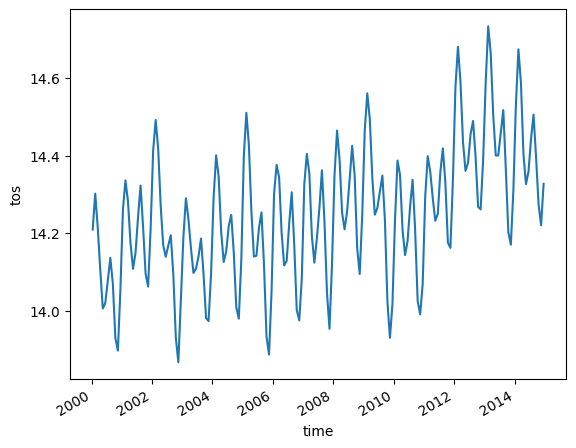

In [15]:
nino_mean.plot()

- What patterns do you observe in this SST time series for the Niño 3.4 region?
- What might be causing the short-term annual variability?
- What might be causing the long-term overall trend?

In [24]:
# to remove explanation

"""
The SST time series indicates an increase from 2000 to 2014 for the Niño 3.4 region. The short-term annual variability is primarily driven by ENSO while the long-term trend of increasing SSTs is largely attributed to human-induced global warming.
"""

'\nThe SST time series indicates an increase from 2000 to 2014 for the Niño 3.4 region. The short-term annual variability is primarily driven by ENSO while the long-term trend of increasing SSTs is largely attributed to human-induced global warming.\n'

# Summary 

- Similar to NumPy, arithmetic operations are vectorized over a DataArray
- Xarray provides aggregation methods like `sum()` and `mean()`, with the option to specify which dimension over which the operation will be done
- `groupby` enables the convenient split-apply-combine workflow
- The `.where()` method allows for filtering or replacing of data based on one or more provided conditions

# What's next?

In the next notebook, we will work through an example of plotting the [Niño 3.4 Index](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni).

Tomorrow and later this week, we'll learn more about ENSO and how modern climate change is impacting this climate phenomenon. Additionally, you will gain insights into projected extremes and variability in climate, providing a comprehensive understanding of future climate scenarios and their implications.